https://arxiv.org/pdf/1610.05708

$$f(x) = \frac{1}{4}\|Ex\|_2^2+\frac{1}{4}\|Ax-b\|_4^4 + \frac{1}{2}\|Cx-d\|_2^2$$

is relatively smooth and strongly convex with 

$$h(x) = \frac{1}{4}\|x\|_2^4+\frac{1}{2}\|x\|_2^2$$

Is 

$$f_1(x,y) = f(x)-f(y)+x^\top By$$

relative strongly monotone  

$$h_1(x,y) = h(x)-h(y)?$$

Then $$\nabla^2 f(x) = \|Ex\|_2^2E^\top E+2E^\top E xx^\top E^\top E+3A^\top D(x)^2 A+C^\top C;D(x) = Diag(Ax-b)$$

we have $$L \nabla^2 h(x) \succeq \nabla^2 f(x) \succeq 
\mu \nabla^2 h(x)$$

Thus we also have,

$$ -L \nabla^2 h(y) \preceq -\nabla^2 f(y) \preceq -\mu \nabla^2 h(y)$$

Now we have,


$$ \frac{\nabla F(x,y)+\nabla F(x,y)^\top}{2} = \begin{bmatrix} \nabla^2 f(x) & 0\\ 0 & -\nabla^2f(y)\end{bmatrix}$$

$$ \frac{\nabla H(x,y)+\nabla H(x,y)^\top}{2} = \begin{bmatrix} \nabla^2 h(x) & 0\\ 0 & -\nabla^2h(y)\end{bmatrix}$$

where $$F(x,y) = (\nabla f(x),-\nabla f(y))~and~H(x,y) = (\nabla h(x),-\nabla h(y)).$$

$$ \frac{\nabla F(x,y)+\nabla F(x,y)^\top}{2} - \mu\frac{\nabla H(x,y)+\nabla H(x,y)^\top}{2} = \begin{bmatrix} \nabla^2 f(x)-\mu\nabla^2 h(y) & 0\\ 0 & \mu\nabla^2 h(y)-\nabla^2f(y)\end{bmatrix}$$

since diagonal blocks are PSD and NSD we have that $F$ is $\mu$-strongly monotone with respect to $H$. 

Similarly we find that $F$ is $L$ relatively smooth with respect to $H$. By observation a bilinear term $x^\top A y$ can also be added.

$$z_{k+\frac{1}{2}} = z' \ \textrm{s.t.,}\ $$
        $$\langle{F(z_k)+L(H(z')-H(z_k)),z'-z\rangle}\leq 0~ \forall z$$ 
        $$z_{k+1} = z' \ \textrm{s.t.,}\ $$
        $$\langle F(z_{k+\frac{1}{2}})+L(H(z')-H(z_k))+m(H(z')-H(z_{k+\frac{1}{2}})),z'-z \rangle\leq 0~ \forall z$$  


We have, $$H(x,y) = ((\|x\|^2x+x),-(\|y\|^2y+y)) $$ and $$F(x,y) = ((\|Ex\|^2E^\top Ex+A^\top[(Ax-b)_i^3]_{i=1}^n)+(Cx-d)+By,-(\|Ey\|^2E^\top Ey+A^\top[(Ay-b)_i^3]_{i=1}^n)+(Cy-d)+B^\top x)$$.

First do mirror prox on : $$F(z_k)+L(H(z')-H(z_k)) = O_k(z')$$ output $$z_{k+\frac{1}{2}}$$ and do mirror prox on,

$$F(z_{k+\frac{1}{2}})+L(H(z')-H(z_k))+m(H(z')-H(z_{k+\frac{1}{2}})) = O_{k+\frac{1}{2}}(z')$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
matrixSize = 1

L = 100
m = 0.1

E = np.random.rand(matrixSize, matrixSize)
E = np.dot(E, E.transpose())

C = np.random.rand(matrixSize, matrixSize)
C = np.dot(C, C.transpose())

B = np.random.rand(matrixSize, matrixSize)

A = np.random.rand(matrixSize, matrixSize)

b = np.random.rand(matrixSize,1)
d = np.random.rand(matrixSize,1)
z = np.random.rand(2*matrixSize,1)


def mirrorfreeMP(z_0,z_00):
    
    for i in range(3):
        
        z_12 = MP1(z_00, z_0)
        print(i)
        z_00 = MP2(z_00, z_12, z_0)
        
    return(z_00)

def MP1(z_k,z_0):
    
    z_0l = []
    for i in range(3):
        
        z_half = z_0 - oracleOk(z_0,z_k)/L
        print('z0',z_0,'zh',z_half,'oracle',oracleOk(z_half,z_k)/L)
        z_0 = z_half - oracleOk(z_half,z_k)/L
        print('z0',z_0,'zh',z_half,'oracle',oracleOk(z_half,z_k)/L)
        z_0l.append(z_0[0])
        
    plt.plot(z_0l)
    
    return z_0

def MP2(z_k,z_half,z_0):
    
    for i in range(3):
        
        z_half = z_0 - oracleOk12(z_0,z_half,z_k)/L
        z_0 = z_half - oracleOk12(z_0,z_half,z_k)/L
        
    return z_0
    
def oracleOk(zp,zk):
    
    return(oracleF(zk)+L*(oracleH(zp)-oracleH(zk)))

def oracleOk12(zp,zk12,zk):
    
    return(oracleF(zk12)+L*(oracleH(zp)-oracleH(zk))+m*(oracleH(zp)-oracleH(zk12)))
    
def oracleF(z):
    
    (x,y) = (z[:matrixSize],z[matrixSize:])
    gx =  (np.linalg.norm(np.dot(E,x))**2*(np.dot(E,np.dot(E,x)))+np.dot(A,(np.dot(A,x)-b)**3)+np.dot(C,x)-d) + np.dot(B,y)
    gy = -(np.linalg.norm(np.dot(E,y))**2*(np.dot(E,np.dot(E,y)))+np.dot(A,(np.dot(A,y)-b)**3)+np.dot(C,y)-d) + np.dot(B.T,x)
    
    return(np.concatenate([gx,gy]))

def oracleH(z):
    
    (x,y) = (z[:matrixSize],z[matrixSize:])
    gx = np.linalg.norm(x)**2*x+x
    gy = -np.linalg.norm(y)**2*y-y
    
    return(np.concatenate([gx,gy]))

z0 [[0.]
 [0.]] zh [[ 0.00256105]
 [-0.00256105]] oracle [[1.67978633e-08]
 [5.12211628e-03]]
z0 [[ 0.00256103]
 [-0.00768317]] zh [[ 0.00256105]
 [-0.00256105]] oracle [[1.67978633e-08]
 [5.12211628e-03]]
z0 [[ 0.00256103]
 [-0.00768317]] zh [[ 0.00256103]
 [-0.01792784]] oracle [[6.66133815e-18]
 [2.04946472e-02]]
z0 [[ 0.00256103]
 [-0.03842248]] zh [[ 0.00256103]
 [-0.01792784]] oracle [[6.66133815e-18]
 [2.04946472e-02]]
z0 [[ 0.00256103]
 [-0.03842248]] zh [[ 0.00256103]
 [-0.07946274]] oracle [[0.        ]
 [0.08252554]]
z0 [[ 0.00256103]
 [-0.16198828]] zh [[ 0.00256103]
 [-0.07946274]] oracle [[0.        ]
 [0.08252554]]
0
z0 [[0.]
 [0.]] zh [[0.00907838]
 [0.07647817]] oracle [[ 7.48212973e-07]
 [-1.53403654e-01]]
z0 [[0.00907763]
 [0.22988182]] zh [[0.00907838]
 [0.07647817]] oracle [[ 7.48212973e-07]
 [-1.53403654e-01]]
z0 [[0.00907763]
 [0.22988182]] zh [[0.00907763]
 [0.54839007]] oracle [[ 4.57284210e-14]
 [-7.89786506e-01]]
z0 [[0.00907763]
 [1.33817658]] zh [[0.0090776

/var/folders/49/567b8wxj313623dgh_lpvfg40000gn/T/ipykernel_41825/4214422894.py:69: RuntimeWarning: overflow encountered in multiply
  gy = -(np.linalg.norm(np.dot(E,y))**2*(np.dot(E,np.dot(E,y)))+np.dot(A,(np.dot(A,y)-b)**3)+np.dot(C,y)-d) + np.dot(B.T,x)
/var/folders/49/567b8wxj313623dgh_lpvfg40000gn/T/ipykernel_41825/4214422894.py:69: RuntimeWarning: overflow encountered in power
  gy = -(np.linalg.norm(np.dot(E,y))**2*(np.dot(E,np.dot(E,y)))+np.dot(A,(np.dot(A,y)-b)**3)+np.dot(C,y)-d) + np.dot(B.T,x)
/var/folders/49/567b8wxj313623dgh_lpvfg40000gn/T/ipykernel_41825/4214422894.py:77: RuntimeWarning: overflow encountered in multiply
  gy = -np.linalg.norm(y)**2*y-y
/var/folders/49/567b8wxj313623dgh_lpvfg40000gn/T/ipykernel_41825/4214422894.py:63: RuntimeWarning: invalid value encountered in add
  return(oracleF(zk12)+L*(oracleH(zp)-oracleH(zk))+m*(oracleH(zp)-oracleH(zk12)))
/var/folders/49/567b8wxj313623dgh_lpvfg40000gn/T/ipykernel_41825/4214422894.py:68: RuntimeWarning: overflow enco

array([[nan],
       [nan]])

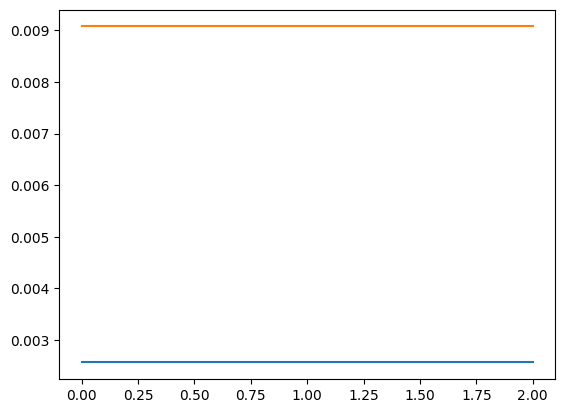

In [4]:
mirrorfreeMP(np.zeros((2*matrixSize,1)),np.zeros((2*matrixSize,1)))